In [56]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from matplotlib import cm

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [82]:
data = np.loadtxt("datos3.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
dataSize = data.shape
X1 = data[:, 0]
X2 = data[:, 1]
Y = data[:, 2]
m = Y.shape
print('Tamaño de datos de entrenamiento:',m[0])
print(dataSize)

Tamaño de datos de entrenamiento: 100
(100, 3)


**PLOT DATA**

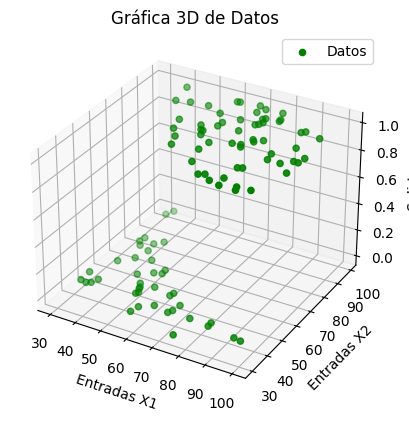

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(data[:,0], data[:,1], data[:,2], c='g', marker='o', label='Datos')

# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


# Crear el trazo de la línea 3D
trace = go.Scatter3d(
    x = data[:,0],
    y = data[:,1],
    z = data[:,2],
    mode = 'markers',
    marker = dict(size = 5),
    line = dict(width = 3)
)

# Definir el diseño del gráfico
layout = go.Layout(
    title = 'X1, X2 vs Y',
    width = 800,  # Ancho de la gráfica en píxeles
    height = 600,  # Alto de la gráfica en píxeles
    scene = dict(
        xaxis = dict(title = 'X1'),
        yaxis = dict(title = 'X2'),
        zaxis = dict(title = 'h')
    )
)

# Crear la figura
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico interactivo en el navegador
fig.show()


**SEGREGAR DATOS DE ENTRENAMIENTO**

(40, 3)
(60, 3)


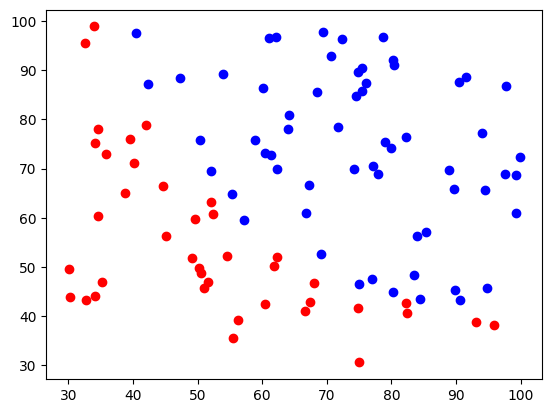

In [59]:
X1 = data[data[:, 2] == 0] # Filtrar las filas donde la Y es igual a 0
X2 = data[data[:, 2] == 1] # Filtrar las filas donde la Y es igual a 1

print(X1.shape)
print(X2.shape)


plt.plot(X1[:, 0],X1[:, 1],'o', color = 'red')
plt.plot(X2[:, 0],X2[:, 1],'o', color = 'blue')
plt.show()

In [60]:
promX = np.mean(data[:, :2], axis=0)
stdX = np.std(data[:, :2], axis=0)

print('promX:', promX)
print('stdX:', stdX)

dataNormal = np.zeros((dataSize[0], dataSize[1]))
for i in range(dataSize[0]):
    for j in range(2):
        dataNormal[i, j] = (data[i, j] - promX[j]) / stdX[j]

promX: [65.64427406 66.22199809]
stdX: [19.36068671 18.48963567]


**PLOT DATA**

In [76]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0 y B1
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X concatenando onesvector con data[:,0] ==> [:,0] significa todas las filas de la columna 0
X = np.column_stack((onesVector,dataNormal[:,0],dataNormal[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y = np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = dataNormal[:,2]

In [77]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))
  betaPrint = np.zeros((numIter,3))

  for i in range(numIter):
    h_beta = np.dot(X,Beta)
    for j in range(3): # Con j=0 se calcula B0, j=1 se calcula B1 y j= 2 calcula B2
      temp1 = (np.reshape(X[:,j],(m,1)))

      #Creo temp_diff solo para guardar la resta entre hipotesis y Y
      temp_diff = np.subtract(h_beta, y)

      # En temp2 reemplazo la parte correspondiente a la resta po la variable temp_diff
      temp2 = np.sum(np. multiply(temp1,temp_diff))

      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))
      betaPrint[i,j] = betaTemp[j,0]

    Beta = betaTemp
    h_beta = np.dot(X,Beta)
    # Cost hace la sumatoria de los cuadrados de temp_diff
    J[i]  = np.sum(np.square(temp_diff)) / (2 * m)

  return (Beta, J, betaPrint, h_beta)


Beta0:  [0.]
Beta1:  [0.]
Beta2:  [0.]


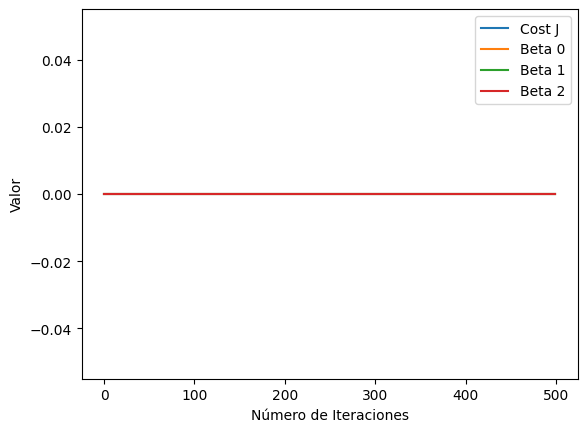

In [84]:
alpha = 0.01
numIter = 500
m = dataSize[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta, J, betaPrint, h_beta = Gradiente(Beta,alpha,m,X,y,numIter,J)
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])

plt.plot(J,'-', label='Cost J')
plt.plot(betaPrint[:, 0],'-', label='Beta 0')
plt.plot(betaPrint[:, 1],'-', label='Beta 1')
plt.plot(betaPrint[:, 2],'-', label='Beta 2')

# Agrega etiquetas a los ejes
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor')

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()


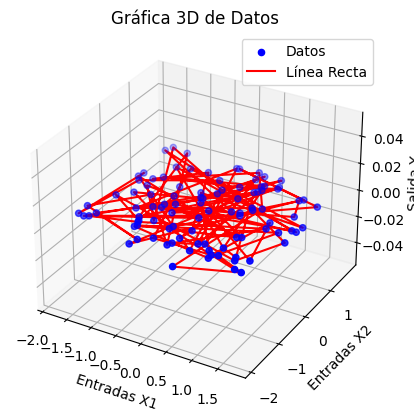

In [64]:
# Crear una figura y un objeto de subtrama 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(dataNormal[:,0], dataNormal[:,1], dataNormal[:,2], c='b', marker='o', label='Datos')



# Definir valores para la línea recta
X1 = X[:, 1]
X2 = X[:, 2]
h_reshape = h_beta.reshape(X1.shape)  # Ajustar la forma de h_beta para que coincida con X1 y X2



# Graficar la línea recta
ax.plot(X1, X2, h_reshape, color='r', label='Línea Recta')


# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

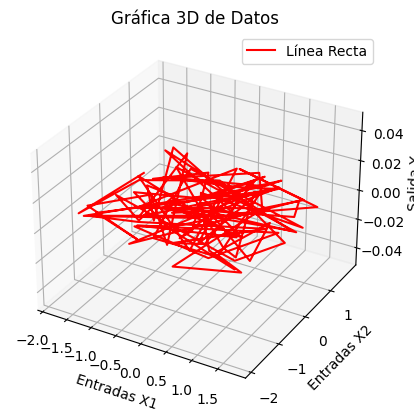

In [65]:
# Crear una figura y un objeto de subtrama 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D

# Definir valores para la línea recta
X1 = X[:, 1]
X2 = X[:, 2]
h_reshape = h_beta.reshape(X1.shape)  # Ajustar la forma de h_beta para que coincida con X1 y X2



# Graficar la línea recta
ax.plot(X1, X2, h_reshape, color='r', label='Línea Recta')

# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()